# This notebook is the work done in data mining course by the group
## We are predicting the fifa player value using multiple machine learning library 
### INFSCI 2160 Data Mining Project

In [91]:
# importing libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import seaborn as sns
import math

from sklearn import metrics

from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
import lightgbm as gbm
import lightgbm as lgb

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool, cv

import hyperopt
import hyperopt as hp
from hyperopt import Trials,fmin,STATUS_OK

import shap

In [2]:
# populating the data in dataframe
df = pd.read_csv('FIFA19.csv')

In [3]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Skill Moves,SlidingTackle,SprintSpeed,Stamina,StandingTackle,Strength,Vision,Volleys,Weak Foot,Work Rate
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,4,26,86,72,28,59,94,86,4,Medium/ Medium
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,5,23,91,88,31,79,82,87,4,High/ Low
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,5,33,90,81,24,49,87,84,5,High/ Medium
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,1,13,58,43,21,64,68,13,3,Medium/ Medium
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,4,51,76,90,58,75,94,82,5,High/ High


In [4]:
df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Value (M),Wage (K),Special,Acceleration,Aggression,...,ShotPower,Skill Moves,SlidingTackle,SprintSpeed,Stamina,StandingTackle,Strength,Vision,Volleys,Weak Foot
count,13725.000000,13725.000000,13725.000000,13725.000000,13725.000000,13526.000000,13533.000000,13725.000000,13725.000000,13725.000000,...,13725.000000,13725.000000,13725.000000,13725.000000,13725.000000,13725.000000,13725.000000,13725.000000,13725.000000,13725.000000
mean,6862.000000,207876.744991,26.358251,69.243716,72.709727,283.479373,12.826424,1673.153515,66.000364,59.172969,...,58.900838,2.492678,47.973260,66.207723,66.204226,50.326412,67.646703,56.332022,45.914536,3.009107
std,3962.210557,30019.777724,4.279283,5.077007,5.734442,324.632817,25.080195,244.766572,14.468533,16.832899,...,16.730235,0.770074,21.614295,14.170072,15.052470,21.804304,11.881728,13.833376,17.828850,0.672234
min,0.000000,16.000000,16.000000,62.000000,62.000000,1.000000,1.000000,848.000000,12.000000,11.000000,...,2.000000,1.000000,4.000000,13.000000,12.000000,2.000000,24.000000,10.000000,4.000000,1.000000
25%,3431.000000,193030.000000,23.000000,65.000000,68.000000,3.000000,2.000000,1571.000000,58.000000,48.000000,...,51.000000,2.000000,26.000000,59.000000,61.000000,30.000000,61.000000,48.000000,33.000000,3.000000
50%,6862.000000,212518.000000,26.000000,68.000000,72.000000,24.500000,5.000000,1709.000000,68.000000,63.000000,...,63.000000,3.000000,57.000000,69.000000,69.000000,60.000000,69.000000,59.000000,48.000000,3.000000
75%,10293.000000,229641.000000,29.000000,72.000000,76.000000,575.000000,13.000000,1830.000000,76.000000,72.000000,...,71.000000,3.000000,66.000000,76.000000,76.000000,68.000000,76.000000,66.000000,60.000000,3.000000
max,13724.000000,246203.000000,45.000000,94.000000,95.000000,975.000000,565.000000,2346.000000,97.000000,95.000000,...,95.000000,5.000000,91.000000,96.000000,96.000000,93.000000,97.000000,94.000000,90.000000,5.000000


In [5]:
df.shape

(13725, 87)

In [6]:
df.isnull().sum(axis = 0)

Unnamed: 0    0
ID            0
Name          0
Age           0
Photo         0
             ..
Strength      0
Vision        0
Volleys       0
Weak Foot     0
Work Rate     0
Length: 87, dtype: int64

In [7]:
df['Value (M)'].fillna((df['Value (M)'].mean()), inplace=True)
df['Wage (K)'].fillna((df['Wage (K)'].mean()), inplace=True)

In [8]:
df.loc[df['Value (M)'] < 100, 'V'] = 0
df.loc[df['Value (M)'] >= 100, 'V'] = 1

In [9]:
df_lc = df.copy()

In [10]:
df_lc['V'].isnull().values.any()

False

In [11]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,SlidingTackle,SprintSpeed,Stamina,StandingTackle,Strength,Vision,Volleys,Weak Foot,Work Rate,V
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,26,86,72,28,59,94,86,4,Medium/ Medium,1.0
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,23,91,88,31,79,82,87,4,High/ Low,0.0
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,33,90,81,24,49,87,84,5,High/ Medium,1.0
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,13,58,43,21,64,68,13,3,Medium/ Medium,0.0
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,51,76,90,58,75,94,82,5,High/ High,1.0


In [12]:
df.dtypes

Unnamed: 0      int64
ID              int64
Name           object
Age             int64
Photo          object
               ...   
Vision          int64
Volleys         int64
Weak Foot       int64
Work Rate      object
V             float64
Length: 88, dtype: object

In [13]:
df['Age'].isnull().values.any()

False

In [14]:
df['Nationality'].isnull().values.any()

False

In [15]:
df['Overall'].isnull().values.any()

False

In [16]:
target = df['V']

In [17]:
df['Value (M)'].fillna((df['Value (M)'].mean()), inplace=True)
df['Wage (K)'].fillna((df['Wage (K)'].mean()), inplace=True)

In [18]:
df['Value (M)'].isnull().values.any()

False

In [19]:
df_lc['V'].isnull().values.any()

False

In [20]:
df['Wage (K)'].isnull().values.any()

False

In [21]:
df['Work Rate'].unique()

array(['Medium/ Medium', 'High/ Low', 'High/ Medium', 'High/ High',
       'Medium/ High', 'Medium/ Low', 'Low/ High', 'Low/ Medium',
       'Low/ Low'], dtype=object)

In [22]:
#df_lc = df.copy()
df_lc['Nationality'] = df_lc['Nationality'].astype('category')
df_lc['Club'] = df_lc['Club'].astype('category') 
df_lc['Work Rate'] = df_lc['Work Rate'].astype('category')
#df_lc['CREATE_DT_TM'] = df_lc['CREATE_DT_TM'].astype('category') 
#df_lc['SCHED_START_DT_TM'] = df_lc['SCHED_START_DT_TM'].astype('category')
#df_lc['RACE'] = df_lc['RACE'].astype('category')
#df_lc['ETHNIC_GROUP'] = df_lc['ETHNIC_GROUP'].astype('category')

df_lc['Nationality'] = df_lc['Nationality'].cat.codes
df_lc['Club'] = df_lc['Club'].cat.codes 
df_lc['Work Rate'] = df_lc['Work Rate'].cat.codes
#df_lc['CREATE_DT_TM'] = df_lc['CREATE_DT_TM'].cat.codes 
#df_lc['SCHED_START_DT_TM'] = df_lc['SCHED_START_DT_TM'].cat.codes
#df_lc['RACE'] = df_lc['RACE'].cat.codes

#df_lc['ETHNIC_GROUP'] = df_lc['ETHNIC_GROUP'].cat.codes

print(df_lc.dtypes)

Unnamed: 0      int64
ID              int64
Name           object
Age             int64
Photo          object
               ...   
Vision          int64
Volleys         int64
Weak Foot       int64
Work Rate        int8
V             float64
Length: 88, dtype: object


In [23]:
df_lc

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,SlidingTackle,SprintSpeed,Stamina,StandingTackle,Strength,Vision,Volleys,Weak Foot,Work Rate,V
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,5,https://cdn.sofifa.org/flags/52.png,94,94,211,...,26,86,72,28,59,94,86,4,8,1.0
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,118,https://cdn.sofifa.org/flags/38.png,94,94,325,...,23,91,88,31,79,82,87,4,1,0.0
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,17,https://cdn.sofifa.org/flags/54.png,92,93,432,...,33,90,81,24,49,87,84,5,2,1.0
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,133,https://cdn.sofifa.org/flags/45.png,91,93,372,...,13,58,43,21,64,68,13,3,8,0.0
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,12,https://cdn.sofifa.org/flags/7.png,91,92,371,...,51,76,90,58,75,94,82,5,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13720,13720,235656,W. Al Anazi,23,https://cdn.sofifa.org/players/4/19/235656.png,125,https://cdn.sofifa.org/flags/183.png,62,69,39,...,56,66,77,57,60,60,37,3,2,1.0
13721,13721,208009,W. Jobello,24,https://cdn.sofifa.org/players/4/19/208009.png,52,https://cdn.sofifa.org/flags/18.png,62,67,261,...,19,70,60,17,57,55,64,3,8,1.0
13722,13722,209546,Rafhael Lucas,25,https://cdn.sofifa.org/players/4/19/209546.png,17,https://cdn.sofifa.org/flags/54.png,62,67,319,...,43,83,54,45,56,53,59,3,8,1.0
13723,13723,226186,Luo Xin,28,https://cdn.sofifa.org/players/4/19/226186.png,27,https://cdn.sofifa.org/flags/155.png,62,63,73,...,61,63,68,64,66,60,44,2,3,1.0


In [24]:
df_lc[['Age','Nationality','Overall','Potential','Club','SlidingTackle','SprintSpeed','Stamina'
              ,'StandingTackle','Strength','Vision','Volleys','Weak Foot','Work Rate','Agility','BallControl'
              ]]=df_lc[['Age','Nationality','Overall','Potential','Club','SlidingTackle','SprintSpeed','Stamina'
              ,'StandingTackle','Strength','Vision','Volleys','Weak Foot','Work Rate','Agility','BallControl'
              ]].astype(float)

In [25]:
df_lc[['Age','Nationality','Overall','Potential','Club','SlidingTackle','SprintSpeed','Stamina'
               ,'StandingTackle','Strength','Vision','Volleys','Weak Foot','Work Rate','Agility','BallControl'
              ]].dtypes

Age               float64
Nationality       float64
Overall           float64
Potential         float64
Club              float64
SlidingTackle     float64
SprintSpeed       float64
Stamina           float64
StandingTackle    float64
Strength          float64
Vision            float64
Volleys           float64
Weak Foot         float64
Work Rate         float64
Agility           float64
BallControl       float64
dtype: object

In [26]:
mms = MinMaxScaler()
mms.fit(df_lc[['Age','Nationality','Overall','Potential','Club','SlidingTackle','SprintSpeed','Stamina'
               ,'StandingTackle','Strength','Vision','Volleys','Weak Foot','Work Rate','Agility','BallControl'
              ]])
data_transformed = mms.transform(df_lc[['Age','Nationality','Overall','Potential','Club','SlidingTackle','SprintSpeed','Stamina'
                                        ,'StandingTackle','Strength','Vision','Volleys','Weak Foot','Work Rate','Agility','BallControl'
                                       ]])

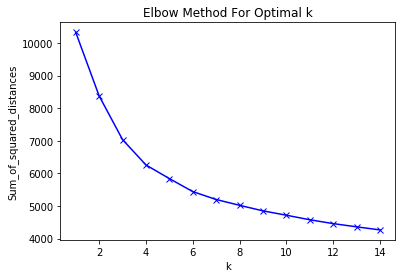

In [27]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [28]:
clusterer = KMeans(6, random_state=1)
clusterer.fit(data_transformed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [29]:
df_lc['clust_grp'] = clusterer.predict(data_transformed)

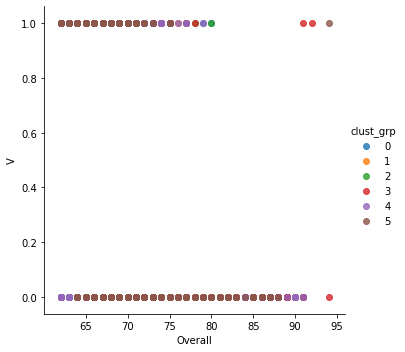

In [30]:
sns.lmplot(data = df_lc, x = 'Overall', y = 'V', hue = 'clust_grp', fit_reg = False)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(df_lc[['Age','Nationality','Overall','Potential','Club',
                                                            'SlidingTackle','SprintSpeed','Stamina', 
                                                            'StandingTackle','Strength','Vision','Volleys',
                                                            'Weak Foot','Work Rate','Agility','BallControl'
                                                          ]], 
                                                    df_lc['V'],
                                                    test_size=0.2, 
                                                    random_state=1)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 1)

In [32]:


dtrain = xgb.DMatrix(data = x_train, label = y_train)
dval = xgb.DMatrix(data = x_val, label = y_val)
dtest = xgb.DMatrix(data = x_test, label = y_test)

/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [33]:
param = {'max_depth':3,
         'eta': 0.35,
         'silent':1,
         'objective':'binary:logistic',
         'eval_metric': 'logloss'
         #,'gamma': ???,
         #,'lambda': ???,
         #,'alpha': ???,
         #,'min_child_weight': ???,
         #,'colsample_bytree' :??? 
         #,colsample_bynode' : ???
         #,'scale_pos_weight' : ???
         ,'maximize' : 'FALSE'
         ,'n_jobs' : -1
         #,'base_score' : ???
         #,'max_delta_step' : ???
        }

In [34]:
watchlist = [(dtrain, 'train'), (dval, 'eval')]
num_round = 25
bst = xgb.train(param, dtrain, num_round, watchlist, early_stopping_rounds = 10)

[0]	train-logloss:0.470552	eval-logloss:0.470575
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 10 rounds.
[1]	train-logloss:0.350062	eval-logloss:0.349596
[2]	train-logloss:0.274873	eval-logloss:0.276006
[3]	train-logloss:0.223652	eval-logloss:0.225261
[4]	train-logloss:0.186122	eval-logloss:0.189057
[5]	train-logloss:0.159369	eval-logloss:0.16381
[6]	train-logloss:0.140692	eval-logloss:0.143477
[7]	train-logloss:0.128943	eval-logloss:0.132057
[8]	train-logloss:0.119648	eval-logloss:0.122729
[9]	train-logloss:0.11077	eval-logloss:0.113954
[10]	train-logloss:0.101958	eval-logloss:0.105804
[11]	train-logloss:0.094801	eval-logloss:0.09788
[12]	train-logloss:0.088758	eval-logloss:0.091449
[13]	train-logloss:0.085337	eval-logloss:0.088145
[14]	train-logloss:0.080684	eval-logloss:0.083601
[15]	train-logloss:0.078603	eval-logloss:0.081434
[16]	train-logloss:0.075	eval-logloss:0.077557
[17]	train-loglos

In [35]:
LOS_train_w_preds = x_train
LOS_train_w_preds['xgb_probs'] = bst.predict(dtrain)

LOS_test_w_preds = x_test
LOS_test_w_preds['xgb_probs'] = bst.predict(dtest)

In [36]:

y = y_test
scores = LOS_test_w_preds['xgb_probs']

In [37]:
fpr, tpr, thresholds = metrics.roc_curve(y, scores)
metrics.auc(fpr, tpr)

0.9972096049484817

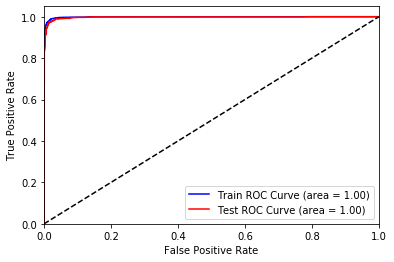

In [38]:

plt.plot(roc_curve(y_train, LOS_train_w_preds['xgb_probs'])[0],roc_curve(y_train, LOS_train_w_preds['xgb_probs'])[1], 
         color = 'blue', label='Train ROC Curve (area = %0.2f)' % roc_auc_score(y_train, LOS_train_w_preds['xgb_probs']))

plt.plot(roc_curve(y_test, LOS_test_w_preds['xgb_probs'])[0],roc_curve(y_test, LOS_test_w_preds['xgb_probs'])[1], 
         color = 'red', label='Test ROC Curve (area = %0.2f)' % roc_auc_score(y_test, LOS_test_w_preds['xgb_probs']))


plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [39]:
param_auc = {'max_depth':3,
         'eta': 0.35,
         'silent':1,
         'objective':'binary:logistic',
         'eval_metric': 'auc'
         #,'gamma': ???,
         #,'lambda': ???,
         #,'alpha': ???,
         #,'min_child_weight': ???,
         #,'colsample_bytree' :??? 
         #,colsample_bynode' : ???
         #,'scale_pos_weight' : ???
         ,'maximize' : 'TRUE'
         ,'n_jobs' : -1
         #,'base_score' : ???
         #,'max_delta_step' : ???
        }

In [40]:
watchlist = [(dtrain, 'train'), (dval, 'eval')]
num_round = 25
bst_auc = xgb.train(param_auc, dtrain, num_round, watchlist, early_stopping_rounds = 10)

[0]	train-auc:0.962117	eval-auc:0.96169
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[1]	train-auc:0.980078	eval-auc:0.981256
[2]	train-auc:0.984336	eval-auc:0.984726
[3]	train-auc:0.988053	eval-auc:0.989249
[4]	train-auc:0.992212	eval-auc:0.992007
[5]	train-auc:0.994082	eval-auc:0.99356
[6]	train-auc:0.994461	eval-auc:0.994133
[7]	train-auc:0.994758	eval-auc:0.994358
[8]	train-auc:0.99527	eval-auc:0.994779
[9]	train-auc:0.995527	eval-auc:0.99513
[10]	train-auc:0.996319	eval-auc:0.995639
[11]	train-auc:0.996651	eval-auc:0.996515
[12]	train-auc:0.99715	eval-auc:0.996989
[13]	train-auc:0.997154	eval-auc:0.99702
[14]	train-auc:0.997519	eval-auc:0.99737
[15]	train-auc:0.997613	eval-auc:0.99746
[16]	train-auc:0.997826	eval-auc:0.997763
[17]	train-auc:0.997866	eval-auc:0.997891
[18]	train-auc:0.997916	eval-auc:0.997901
[19]	train-auc:0.998114	eval-auc:0.998049
[20]	train-auc:0.998272	eval-auc:0.99

In [41]:
LOS_train_w_preds['xgb_probs_auc'] = bst_auc.predict(dtrain)
LOS_test_w_preds['xgb_probs_auc'] = bst_auc.predict(dtest)

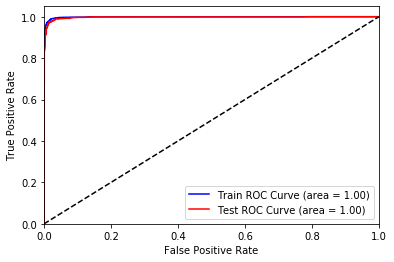

In [42]:


plt.plot(roc_curve(y_train, LOS_train_w_preds['xgb_probs_auc'])[0],roc_curve(y_train, LOS_train_w_preds['xgb_probs_auc'])[1], 
         color = 'blue', label='Train ROC Curve (area = %0.2f)' % roc_auc_score(y_train, LOS_train_w_preds['xgb_probs_auc']))

plt.plot(roc_curve(y_test, LOS_test_w_preds['xgb_probs_auc'])[0],roc_curve(y_test, LOS_test_w_preds['xgb_probs_auc'])[1], 
         color = 'red', label='Test ROC Curve (area = %0.2f)' % roc_auc_score(y_test, LOS_test_w_preds['xgb_probs_auc']))


plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [43]:
#lightgbm

In [44]:
param_aucpr = {'max_depth':3,
         'eta': 0.01,
         'silent':1,
         'objective':'binary:logistic',
         'eval_metric': 'aucpr'
         #,'gamma': ???,
         #,'lambda': ???,
         #,'alpha': ???,
         #,'min_child_weight': ???,
         #,'colsample_bytree' :??? 
         #,colsample_bynode' : ???
         #,'scale_pos_weight' : ???
         ,'maximize' : 'TRUE'
         ,'n_jobs' : -1
         #,'base_score' : ???
         #,'max_delta_step' : ???
        }

In [45]:
watchlist = [(dtrain, 'train'), (dval, 'eval')]
bst_aucpr = xgb.train(param_aucpr, dtrain, num_round, watchlist, early_stopping_rounds = 10)

[0]	train-aucpr:0.947447	eval-aucpr:0.942643
Multiple eval metrics have been passed: 'eval-aucpr' will be used for early stopping.

Will train until eval-aucpr hasn't improved in 10 rounds.
[1]	train-aucpr:0.9724	eval-aucpr:0.971484
[2]	train-aucpr:0.972027	eval-aucpr:0.971373
[3]	train-aucpr:0.9724	eval-aucpr:0.971484
[4]	train-aucpr:0.972027	eval-aucpr:0.971373
[5]	train-aucpr:0.9724	eval-aucpr:0.971484
[6]	train-aucpr:0.972027	eval-aucpr:0.971373
[7]	train-aucpr:0.972603	eval-aucpr:0.971551
[8]	train-aucpr:0.972513	eval-aucpr:0.9716
[9]	train-aucpr:0.972889	eval-aucpr:0.971862
[10]	train-aucpr:0.973568	eval-aucpr:0.972635
[11]	train-aucpr:0.973832	eval-aucpr:0.972804
[12]	train-aucpr:0.973616	eval-aucpr:0.97264
[13]	train-aucpr:0.973755	eval-aucpr:0.972481
[14]	train-aucpr:0.973832	eval-aucpr:0.972804
[15]	train-aucpr:0.973755	eval-aucpr:0.972481
[16]	train-aucpr:0.973715	eval-aucpr:0.972445
[17]	train-aucpr:0.976358	eval-aucpr:0.975357
[18]	train-aucpr:0.976363	eval-aucpr:0.975264


In [46]:
LOS_train_w_preds['xgb_probs_aucpr'] = bst_aucpr.predict(dtrain)
LOS_test_w_preds['xgb_probs_aucpr'] = bst_aucpr.predict(dtest)

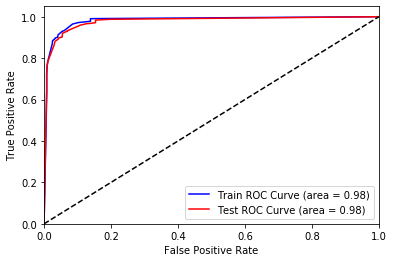

In [47]:


plt.plot(roc_curve(y_train, LOS_train_w_preds['xgb_probs_aucpr'])[0],roc_curve(y_train, LOS_train_w_preds['xgb_probs_aucpr'])[1], 
         color = 'blue', label='Train ROC Curve (area = %0.2f)' % roc_auc_score(y_train, LOS_train_w_preds['xgb_probs_aucpr']))

plt.plot(roc_curve(y_test, LOS_test_w_preds['xgb_probs_aucpr'])[0],roc_curve(y_test, LOS_test_w_preds['xgb_probs_aucpr'])[1], 
         color = 'red', label='Test ROC Curve (area = %0.2f)' % roc_auc_score(y_test, LOS_test_w_preds['xgb_probs_aucpr']))


plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [50]:

lgb_LOS_train = lgb.Dataset(x_train.drop(columns = ['xgb_probs', 'xgb_probs_auc', 'xgb_probs_aucpr'])
                                          , y_train)
lgb_val_train = lgb.Dataset(x_val, y_val)

In [51]:
lgb_params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'max_depth' : 3,
    #'num_leaves' : ???
    'learning_rate': 0.1,
    #'num_threads' : -1,
    #'scale_pos_weight' : ???
    'early_stopping_round' : 10,
    # min_data_in_leaf = ???,
    # pos_bagging_fraction = ???,
    # neg_bagging_fraction = ???,
    # bagging_freq = ???,
    # max_delta_step = ???,
    #'top_rate' : ???
    #'other_rate' : ???
    #'lambda_l1' : ???
    #'lambda_l2' : ???
}

In [52]:
lgb_gbm = lgb.train(params = lgb_params, train_set = lgb_LOS_train,
                num_boost_round = 100, valid_sets = [lgb_val_train, lgb_LOS_train],
               valid_names = ['Evaluation', 'Train'])

/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	Train's binary_logloss: 0.619897	Evaluation's binary_logloss: 0.619586
Training until validation scores don't improve for 10 rounds
[2]	Train's binary_logloss: 0.55825	Evaluation's binary_logloss: 0.558681
[3]	Train's binary_logloss: 0.506822	Evaluation's binary_logloss: 0.506745
[4]	Train's binary_logloss: 0.463462	Evaluation's binary_logloss: 0.463561
[5]	Train's binary_logloss: 0.424571	Evaluation's binary_logloss: 0.425011
[6]	Train's binary_logloss: 0.39243	Evaluation's binary_logloss: 0.392827
[7]	Train's binary_logloss: 0.363934	Evaluation's binary_logloss: 0.364032
[8]	Train's binary_logloss: 0.33829	Evaluation's binary_logloss: 0.338898
[9]	Train's binary_logloss: 0.316111	Evaluation's binary_logloss: 0.316496
[10]	Train's binary_logloss: 0.295015	Evaluation's binary_logloss: 0.295898
[11]	Train's binary_logloss: 0.276773	Evaluation's binary_logloss: 0.278135
[12]	Train's binary_logloss: 0.259863	Evaluation's binary_logloss: 0.261334
[13]	Train's binary_logloss: 0.244332	E

In [53]:
y_probs_train = lgb_gbm.predict(x_train.drop(columns = ['xgb_probs', 'xgb_probs_auc', 'xgb_probs_aucpr']))
y_probs_test = lgb_gbm.predict(x_test)

In [54]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_probs_train)
metrics.auc(fpr, tpr)

0.9990847942366046

In [55]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_probs_test)
metrics.auc(fpr, tpr)

0.99785544831761

In [135]:
difference=0.9990847942366046-0.99785544831761
difference

0.0012293459189945954

In [57]:
#catboost

In [58]:
x_train_cat = x_train.drop(columns = ['xgb_probs', 'xgb_probs_auc', 'xgb_probs_aucpr'])
x_val_cat = x_val
x_test_cat = x_test.drop(columns = ['xgb_probs', 'xgb_probs_auc', 'xgb_probs_aucpr'])

In [59]:
x_train_cat[['Age','Nationality','Overall','Potential','Club',
                                                            'SlidingTackle','SprintSpeed','Stamina', 
                                                            'StandingTackle','Strength','Vision','Volleys',
                                                            'Weak Foot','Work Rate','Agility','BallControl'
                                                          ]] = x_train_cat[['Age','Nationality','Overall','Potential','Club',
                                                            'SlidingTackle','SprintSpeed','Stamina', 
                                                            'StandingTackle','Strength','Vision','Volleys',
                                                            'Weak Foot','Work Rate','Agility','BallControl']].astype(str)

x_val_cat[['Age','Nationality','Overall','Potential','Club',
                                                            'SlidingTackle','SprintSpeed','Stamina', 
                                                            'StandingTackle','Strength','Vision','Volleys',
                                                            'Weak Foot','Work Rate','Agility','BallControl']] = x_val_cat[['Age','Nationality','Overall','Potential','Club',
                                                            'SlidingTackle','SprintSpeed','Stamina', 
                                                            'StandingTackle','Strength','Vision','Volleys',
                                                            'Weak Foot','Work Rate','Agility','BallControl']].astype(str)

x_test_cat[['Age','Nationality','Overall','Potential','Club',
                                                            'SlidingTackle','SprintSpeed','Stamina', 
                                                            'StandingTackle','Strength','Vision','Volleys',
                                                            'Weak Foot','Work Rate','Agility','BallControl']] = x_test_cat[['Age','Nationality','Overall','Potential','Club',
                                                            'SlidingTackle','SprintSpeed','Stamina', 
                                                            'StandingTackle','Strength','Vision','Volleys',
                                                            'Weak Foot','Work Rate','Agility','BallControl']].astype(str)
x_train_cat.head()

,Age,Nationality,Overall,Potential,Club,SlidingTackle,SprintSpeed,Stamina,StandingTackle,Strength,Vision,Volleys,Weak Foot,Work Rate,Agility,BallControl
995,27.0,56.0,77.0,78.0,86.0,78.0,64.0,69.0,78.0,74.0,71.0,55.0,3.0,0.0,70.0,73.0
1046,30.0,152.0,77.0,77.0,267.0,80.0,80.0,83.0,77.0,73.0,52.0,59.0,3.0,2.0,79.0,69.0
10736,24.0,43.0,65.0,68.0,316.0,21.0,90.0,62.0,25.0,58.0,51.0,54.0,3.0,2.0,73.0,60.0
11670,19.0,12.0,64.0,77.0,333.0,36.0,77.0,41.0,35.0,55.0,60.0,51.0,4.0,8.0,71.0,67.0
8039,30.0,74.0,67.0,67.0,235.0,12.0,68.0,56.0,13.0,74.0,50.0,68.0,4.0,7.0,67.0,65.0


In [60]:

predictors = x_train_cat
categorical_var = np.where(predictors.dtypes != np.float)[0]
print('\nCategorical Variables indices : ',categorical_var)


Categorical Variables indices :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [61]:


cat_boost_model = CatBoostClassifier(
    loss_function = 'Logloss',
    random_seed=42,
    iterations = 10,
    learning_rate = 0.03,
    early_stopping_rounds = 10,
    #l2_leaf_reg = ???
    depth = 3
    
)

In [62]:
cat_boost_model.fit(
    x_train_cat, y_train
    ,cat_features=categorical_var,
    eval_set=(x_val_cat, y_val)
    , plot = True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6730365	test: 0.6728081	best: 0.6728081 (0)	total: 75.3ms	remaining: 677ms
1:	learn: 0.6540668	test: 0.6535395	best: 0.6535395 (1)	total: 84.4ms	remaining: 338ms
2:	learn: 0.6355522	test: 0.6346202	best: 0.6346202 (2)	total: 97.3ms	remaining: 227ms
3:	learn: 0.6182280	test: 0.6169777	best: 0.6169777 (3)	total: 105ms	remaining: 158ms
4:	learn: 0.6014465	test: 0.5999719	best: 0.5999719 (4)	total: 120ms	remaining: 120ms
5:	learn: 0.5858534	test: 0.5838196	best: 0.5838196 (5)	total: 128ms	remaining: 85.6ms
6:	learn: 0.5707123	test: 0.5684647	best: 0.5684647 (6)	total: 136ms	remaining: 58.4ms
7:	learn: 0.5567095	test: 0.5540783	best: 0.5540783 (7)	total: 144ms	remaining: 36.1ms
8:	learn: 0.5434796	test: 0.5409525	best: 0.5409525 (8)	total: 155ms	remaining: 17.2ms
9:	learn: 0.5306074	test: 0.5277187	best: 0.5277187 (9)	total: 163ms	remaining: 0us

bestTest = 0.5277186624
bestIteration = 9



In [63]:
catboost_probs_train = cat_boost_model.predict_proba(x_train_cat)
catboost_probs = cat_boost_model.predict_proba(x_test_cat)

In [64]:
catboost_probs_df_train = pd.DataFrame(catboost_probs_train)
catboost_probs_df_train = catboost_probs_df_train.add_prefix('cat')

catboost_probs_df = pd.DataFrame(catboost_probs)
catboost_probs_df = catboost_probs_df.add_prefix('cat')
fprc, tprc, thresholds = metrics.roc_curve(y_train, catboost_probs_df_train['cat1'])
metrics.auc(fprc, tprc)

0.9665776697468413

In [65]:
fprc, tprc, thresholds = metrics.roc_curve(y_test, catboost_probs_df['cat1'])
metrics.auc(fprc, tprc)

0.9639281557867991

In [66]:
difference=0.8354900825617795-0.8174167022637224
difference

0.01807338029805705

In [67]:
catboost_probs.shape

(2745, 2)

In [68]:
catboost_probs_train

array([[0.62116029, 0.37883971],
       [0.62116029, 0.37883971],
       [0.37563388, 0.62436612],
       ...,
       [0.61641858, 0.38358142],
       [0.62116029, 0.37883971],
       [0.37563388, 0.62436612]])

In [69]:
catboost_probs_train.shape

(8784, 2)

In [70]:

x_train, x_test, y_train, y_test = train_test_split(df_lc[['Age','Nationality','Overall','Potential','Club',
                                                            'SlidingTackle','SprintSpeed','Stamina', 
                                                            'StandingTackle','Strength','Vision','Volleys',
                                                            'Weak Foot','Work Rate','Agility','BallControl'
                                                          ]], 
                                                    df_lc['V'],
                                                    test_size=0.2, 
                                                    random_state=1)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 1)

In [71]:


rf_cv = RandomForestClassifier()

In [72]:
rfc_param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 3, 5#, 80, 90, 100, 110
                 ],
    'max_features': [2, 3, 5],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [10, 22],
    'criterion' : ['gini', 'entropy']
    #,min_impurity_decrease : [???]
    #,min_impurity_split : [???]
    #,class_weight : [???]
}

In [73]:


rfc_gs = GridSearchCV(estimator=rf_cv, param_grid=rfc_param_grid, cv= 5, scoring = 'roc_auc'
                     #scoring methods also include: accuracy, balanced accuracy, average precision, f1, etc.  see documentation
                     )

In [74]:
dfs = [x_train, x_val]
dfsy = [y_train, y_val]
x_train_rf = pd.concat(dfs)
y_train_rf = pd.concat(dfsy)

In [75]:

lightgbm_hp_train = lgb.Dataset(x_train_rf, y_train_rf)

In [76]:
lightgbm_hp_train = lgb.Dataset(x_train, y_train)

In [77]:
lightgbm_hp_val = lgb.Dataset(x_val, y_val)

In [78]:
lgbm_space = {

    #'boosting_type': hp.hp.choice('boosting_type',  ['gbdt']),
    'num_leaves':hp.hp.choice('num_leaves', np.arange(10, 300,1, dtype=int)),

    'subsample':hp.hp.quniform('subsample',0.5,1.0,0.05),
    'colsample_bytree':hp.hp.quniform('colsample_bytree',0.5,1.0,0.05),
    'min_child_weight':hp.hp.quniform('min_child_weight', 100, 1000,100),
    'reg_alpha': hp.hp.uniform('reg_alpha', 0.0, 1000.0),
    'reg_lambda': hp.hp.uniform('reg_lambda', 0.0, 1000.0),
    'learning_rate': hp.hp.loguniform('learning_rate', -4, 0),
    'feature_fraction': hp.hp.loguniform('feature_fraction', -4, 0),
    'bagging_fraction': hp.hp.loguniform('bagging_fraction', -4, 0),
    'bagging_frequency':hp.hp.choice('bagging_frequency', np.arange(5, 100,1, dtype=int)),
    'drop_rate': hp.hp.loguniform('drop_rate', -4, 0),
    'scale_pos_weight': hp.hp.uniform('scale_pos_weight', 6.0, 10.0),
    
    'num_class' : 1, 
    'metric' : 'auc',
    'nthread': 6, 
    'max_bin': 512
    }

In [79]:
def objective_m(params, n_folds=5):


    model = lgb.cv(params = params,
              train_set = lightgbm_hp_train,
              num_boost_round = 10000,
              early_stopping_rounds = 10,
             nfold = n_folds)
  
    
  
    # returns the best average loss on validation set 
    
    loss = 1 - (max(model['auc-mean']))
    return loss


bayes_trials = Trials()
MAX_EVALS = 100 # this controls the runtime 

lgbm_best_m = fmin(fn = objective_m, space = lgbm_space, algo = hp.tpe.suggest, 
max_evals = MAX_EVALS, trials = bayes_trials)

100%|██████████| 100/100 [01:06<00:00,  1.51it/s, best loss: 0.007773517976137567]


In [80]:
lgbm_best_m

{'bagging_fraction': 0.018939928488523095,
 'bagging_frequency': 37,
 'colsample_bytree': 0.7000000000000001,
 'drop_rate': 0.05001289381534214,
 'feature_fraction': 0.9551147246752031,
 'learning_rate': 0.2663490048196951,
 'min_child_weight': 500.0,
 'num_leaves': 231,
 'reg_alpha': 0.4033832486026938,
 'reg_lambda': 16.130919050278834,
 'scale_pos_weight': 9.971699785981867,
 'subsample': 0.5}

In [81]:
lgb_gbm_auc = lgb.train(params = lgbm_best_m, train_set = lgb_LOS_train,
                num_boost_round = 100, valid_sets = [lgb_val_train, lgb_LOS_train],
               valid_names = ['Evaluation', 'Train'])

In [82]:
lgb_gbm_auc

In [83]:
watchlist = [(dtrain, 'train'), (dval, 'eval')]
num_round = 25
best_auc = xgb.train(lgbm_best_m, dtrain, num_round, watchlist, early_stopping_rounds = 10)

[0]	train-rmse:0.453742	eval-rmse:0.45674
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 10 rounds.
[1]	train-rmse:0.388114	eval-rmse:0.391675
[2]	train-rmse:0.369756	eval-rmse:0.374557
[3]	train-rmse:0.360872	eval-rmse:0.366338
[4]	train-rmse:0.334288	eval-rmse:0.340141
[5]	train-rmse:0.33153	eval-rmse:0.338538
[6]	train-rmse:0.332756	eval-rmse:0.340812
[7]	train-rmse:0.317939	eval-rmse:0.325408
[8]	train-rmse:0.310888	eval-rmse:0.319495
[9]	train-rmse:0.296214	eval-rmse:0.304925
[10]	train-rmse:0.283676	eval-rmse:0.293001
[11]	train-rmse:0.282905	eval-rmse:0.292248
[12]	train-rmse:0.28154	eval-rmse:0.291309
[13]	train-rmse:0.280314	eval-rmse:0.290142
[14]	train-rmse:0.276985	eval-rmse:0.286789
[15]	train-rmse:0.267399	eval-rmse:0.277591
[16]	train-rmse:0.263498	eval-rmse:0.273587
[17]	train-rmse:0.262335	eval-rmse:0.272694
[18]	train-rmse:0.259989	eval-rmse:0.270182
[19]	train-rmse:0.257828	eval-rmse

In [84]:
LOS_train_w_preds['xgb_probs_auc'] = best_auc.predict(dtrain)
LOS_test_w_preds['xgb_probs_auc'] = best_auc.predict(dtest)

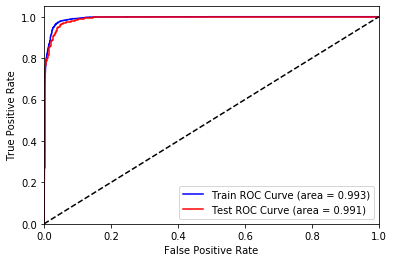

In [85]:

plt.plot(roc_curve(y_train, LOS_train_w_preds['xgb_probs_auc'])[0],roc_curve(y_train, LOS_train_w_preds['xgb_probs_auc'])[1], 
         color = 'blue', label='Train ROC Curve (area = %0.3f)' % roc_auc_score(y_train, LOS_train_w_preds['xgb_probs_auc']))

plt.plot(roc_curve(y_test, LOS_test_w_preds['xgb_probs_auc'])[0],roc_curve(y_test, LOS_test_w_preds['xgb_probs_auc'])[1], 
         color = 'red', label='Test ROC Curve (area = %0.3f)' % roc_auc_score(y_test, LOS_test_w_preds['xgb_probs_auc']))


plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [86]:
y_probs_train = lgb_gbm_auc.predict(x_train)
y_probs_test = lgb_gbm_auc.predict(x_test)

In [87]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_probs_train)
metrics.auc(fpr, tpr)

0.9959187288570305

In [88]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_probs_test)
metrics.auc(fpr, tpr)

0.9919743836778542

In [89]:
difference=0.8229433785376189-0.8055372048045544
difference

0.017406173733064523

In [92]:

def hyperopt_objective(params):
    model1 = CatBoostClassifier(
        l2_leaf_reg=(params['l2_leaf_reg']),
        learning_rate=params['learning_rate'],
        iterations=500,
        eval_metric='Accuracy',
        random_seed=42,
        logging_level='Silent',
        loss_function='Logloss'
        
    )
    
    cv_data = cv(
        Pool(x_train_cat, y_train, cat_features=categorical_var),
        model1.get_params()
    )
    best_accuracy = np.max(cv_data['test-Accuracy-mean'])
    
    return 1 - best_accuracy # as hyperopt minimises

from numpy.random import RandomState

params_space = {
    'l2_leaf_reg': hyperopt.hp.qloguniform('l2_leaf_reg', 0, 2, 1),
    'learning_rate': hyperopt.hp.uniform('learning_rate', 1e-3, 5e-1),
    'depth': hyperopt.hp.choice('depth', [3,4,5,6,8]),
    'iterations': hyperopt.hp.choice('iterations', range(20,1020,20)), 
#'depth': hyperopt.hp.choice('depth', range(1, 11,1)),

}

trials = hyperopt.Trials()

best = hyperopt.fmin(
    hyperopt_objective,
    space=params_space,
    algo=hyperopt.tpe.suggest,
    max_evals=50,
    trials=trials
)

print(best)

100%|██████████| 50/50 [44:15<00:00, 53.11s/it, best loss: 0.017531722128517835]
{'depth': 0, 'iterations': 2, 'l2_leaf_reg': 4.0, 'learning_rate': 0.25548037276798774}


In [93]:

cat_boost_model = CatBoostClassifier(
    loss_function = 'Logloss',
    random_seed=42,
    iterations = 29,
    learning_rate = 0.10534620463009686,
    early_stopping_rounds = 10,
    l2_leaf_reg = 3,
    depth = 3
    
)

In [94]:
cat_boost_model.fit(
    x_train_cat, y_train
    ,cat_features=categorical_var,
    eval_set=(x_val_cat, y_val)
    , plot = True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6252068	test: 0.6244075	best: 0.6244075 (0)	total: 14.8ms	remaining: 415ms
1:	learn: 0.5693661	test: 0.5677094	best: 0.5677094 (1)	total: 23.6ms	remaining: 318ms
2:	learn: 0.5211183	test: 0.5183477	best: 0.5183477 (2)	total: 34.6ms	remaining: 300ms
3:	learn: 0.4810769	test: 0.4775357	best: 0.4775357 (3)	total: 42.8ms	remaining: 267ms
4:	learn: 0.4449783	test: 0.4418018	best: 0.4418018 (4)	total: 54.1ms	remaining: 260ms
5:	learn: 0.4147581	test: 0.4115252	best: 0.4115252 (5)	total: 62.2ms	remaining: 238ms
6:	learn: 0.3898842	test: 0.3860616	best: 0.3860616 (6)	total: 70.2ms	remaining: 221ms
7:	learn: 0.3672504	test: 0.3636403	best: 0.3636403 (7)	total: 78.4ms	remaining: 206ms
8:	learn: 0.3469182	test: 0.3425647	best: 0.3425647 (8)	total: 90.6ms	remaining: 201ms
9:	learn: 0.3300288	test: 0.3257821	best: 0.3257821 (9)	total: 98.8ms	remaining: 188ms
10:	learn: 0.3148626	test: 0.3105255	best: 0.3105255 (10)	total: 107ms	remaining: 175ms
11:	learn: 0.3014008	test: 0.2974830	best:

In [95]:
catboost_probs_train = cat_boost_model.predict_proba(x_train_cat)
catboost_probs = cat_boost_model.predict_proba(x_test_cat)

In [96]:
catboost_probs_df_train = pd.DataFrame(catboost_probs_train)
catboost_probs_df_train = catboost_probs_df_train.add_prefix('cat')

catboost_probs_df = pd.DataFrame(catboost_probs)
catboost_probs_df = catboost_probs_df.add_prefix('cat')
fprc, tprc, thresholds = metrics.roc_curve(y_train, catboost_probs_df_train['cat1'])
metrics.auc(fprc, tprc)

0.9892275993160822

In [97]:
fprc, tprc, thresholds = metrics.roc_curve(y_test, catboost_probs_df['cat1'])
metrics.auc(fprc, tprc)

0.9870106617443314

In [98]:
diff= 0.8374760134104592-0.8217871118622712
diff

0.015688901548188028

1) I think my Catboost model was best so I decided to work with hyperopt to get better result. It definitely improve my auc values. I think the model is well fit since the difference is not that close and the train auc is neither too low or nor too high.

In [99]:
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
rf_clf_model = rf_clf.fit(x_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [100]:
rf_train_probs = rf_clf_model.predict_proba(x_train)
rf_test_probs = rf_clf_model.predict_proba(x_test)

In [101]:
rf_train_prob_cols = ['V', 'proba']

In [102]:
rf_preds_train = pd.DataFrame(rf_train_probs, columns=rf_train_prob_cols)
rf_preds_test = pd.DataFrame(rf_test_probs, columns=rf_train_prob_cols)

In [103]:

fpr, tpr, thresholds = metrics.roc_curve(y_train, rf_preds_train['proba'])
metrics.auc(fpr, tpr)


0.9999954107479143

In [104]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_preds_test['proba'])
metrics.auc(fpr, tpr)

0.9948995958683078

In [105]:
rf_clf.feature_importances_

array([0.08237673, 0.00791061, 0.30251477, 0.22617023, 0.03030636,
       0.02334843, 0.01535121, 0.01439263, 0.03736774, 0.01141963,
       0.0369194 , 0.01586687, 0.00255323, 0.00401265, 0.01123948,
       0.17825003])

In [106]:
rf_clf_feat_names = x_train.columns

In [107]:
rf_clf_importances = rf_clf.feature_importances_

Text(0.5, 0, 'Relative Importance: Gini')

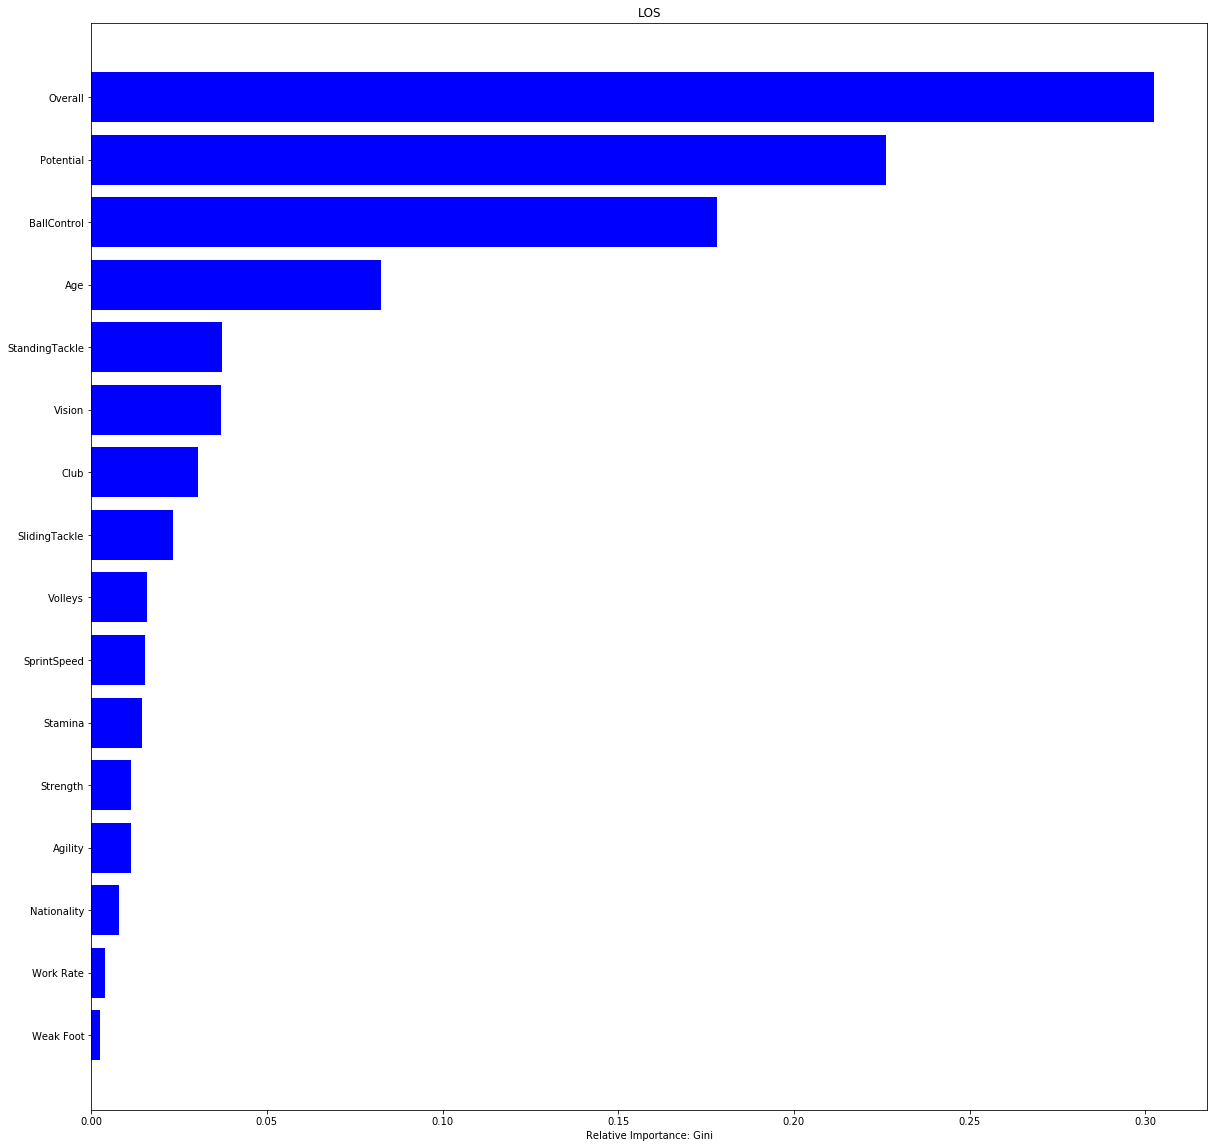

In [108]:


figure(num=None, figsize = (20,20))

indices = np.argsort(rf_clf_importances)

plt.figure(1)
plt.title('LOS')
plt.barh(range(len(indices)), rf_clf_importances[indices], color = 'b', align = 'center')
plt.yticks(range(len(indices)), rf_clf_feat_names[indices])
plt.xlabel('Relative Importance: Gini')

In [109]:
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1, criterion = 'gini', max_features = 5, max_depth = 13,
                               min_samples_split = 500,
                               min_samples_leaf = 30
                               #min_weight_fraction = ???,
                               #min_impurity_decrease = ???,
                               #class_weight = ???
                               )

In [110]:
rf_clf_model = rf_clf.fit(x_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [111]:
rf_train_probs = rf_clf_model.predict_proba(x_train)
rf_test_probs = rf_clf_model.predict_proba(x_test)

In [112]:
rf_train_prob_cols = ['V', 'proba']

In [113]:
rf_preds_train = pd.DataFrame(rf_train_probs, columns=rf_train_prob_cols)
rf_preds_test = pd.DataFrame(rf_test_probs, columns=rf_train_prob_cols)

In [114]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, rf_preds_train['proba'])
metrics.auc(fpr, tpr)

0.9868307392564312

In [115]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_preds_test['proba'])
metrics.auc(fpr, tpr)

0.9844518004748974

In [116]:
rf_clf_importances = rf_clf.feature_importances_

Text(0.5, 0, 'Relative Importance: Gini')

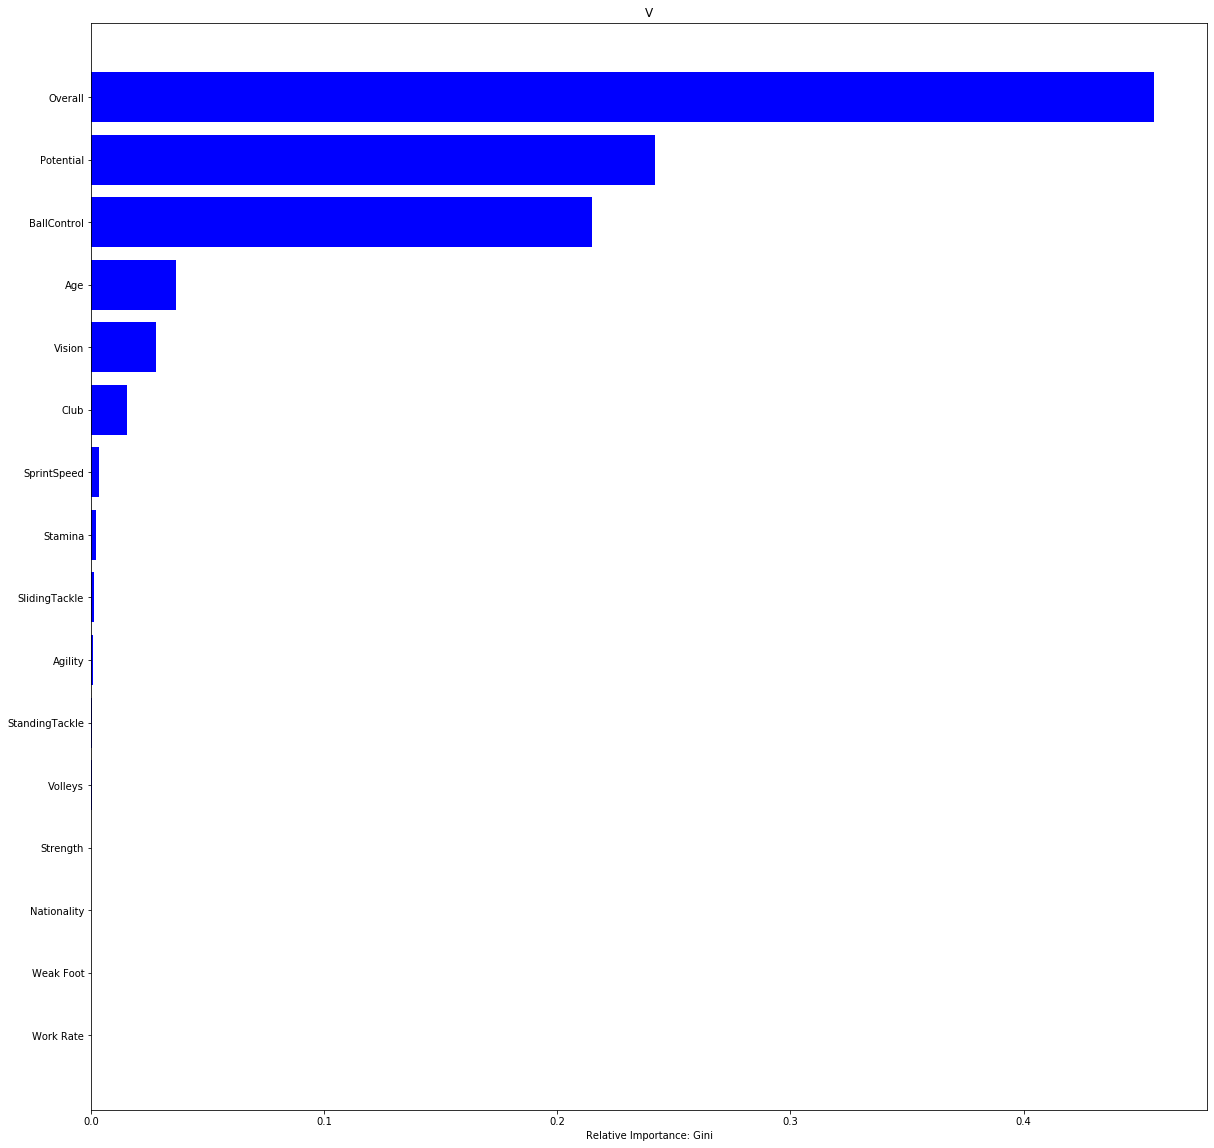

In [117]:

figure(num=None, figsize = (20,20))

indices = np.argsort(rf_clf_importances)

plt.figure(1)
plt.title('V')
plt.barh(range(len(indices)), rf_clf_importances[indices], color = 'b', align = 'center')
plt.yticks(range(len(indices)), rf_clf_feat_names[indices])
plt.xlabel('Relative Importance: Gini')

In [118]:

gbm_clf = gbm.LGBMClassifier(boosting_type = 'gbdt',
                             #num_leaves = ,
                             #max_depth = ,
                             learning_rate = 0.1
                             #n_estimators = 
                             #,subsample_for_bin =
                             ,objective = 'binary'
                             ,metric = 'binary_logloss'
                         #,class_weight = 
                         #,min_split_gain =
                         #,min_split_weight =
                         #,min_child_weight =
                         #,min_child_samples =
                         #,subsample =
                         #,subsample_freq =
                         #,colsample_bytree =
                         ,reg_alpha = 5
                         ,reg_lambda = 120
                         ,importance_type = 'split' #will rank features by # of times it is used in model.'gain' for gain
                             ,num_iterations = 1000
                       )

In [119]:
gbm_clf.fit(x_train, y_train, eval_metric = 'logloss', verbose = True, eval_set = [(x_val, y_val)],
       early_stopping_rounds = 20)

/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's binary_logloss: 0.629184
Training until validation scores don't improve for 20 rounds
[2]	valid_0's binary_logloss: 0.575068
[3]	valid_0's binary_logloss: 0.52837
[4]	valid_0's binary_logloss: 0.48845
[5]	valid_0's binary_logloss: 0.453913
[6]	valid_0's binary_logloss: 0.423151
[7]	valid_0's binary_logloss: 0.395747
[8]	valid_0's binary_logloss: 0.371717
[9]	valid_0's binary_logloss: 0.350554
[10]	valid_0's binary_logloss: 0.331114
[11]	valid_0's binary_logloss: 0.313586
[12]	valid_0's binary_logloss: 0.297535
[13]	valid_0's binary_logloss: 0.283412
[14]	valid_0's binary_logloss: 0.270661
[15]	valid_0's binary_logloss: 0.259437
[16]	valid_0's binary_logloss: 0.248897
[17]	valid_0's binary_logloss: 0.239269
[18]	valid_0's binary_logloss: 0.23015
[19]	valid_0's binary_logloss: 0.222017
[20]	valid_0's binary_logloss: 0.214409
[21]	valid_0's binary_logloss: 0.207333
[22]	valid_0's binary_logloss: 0.200612
[23]	valid_0's binary_logloss: 0.194424
[24]	valid_0's binary_logloss: 

[262]	valid_0's binary_logloss: 0.0624374
[263]	valid_0's binary_logloss: 0.0623489
[264]	valid_0's binary_logloss: 0.0622785
[265]	valid_0's binary_logloss: 0.0622126
[266]	valid_0's binary_logloss: 0.0621588
[267]	valid_0's binary_logloss: 0.0621111
[268]	valid_0's binary_logloss: 0.0620628
[269]	valid_0's binary_logloss: 0.0620083
[270]	valid_0's binary_logloss: 0.0619468
[271]	valid_0's binary_logloss: 0.0618578
[272]	valid_0's binary_logloss: 0.0618344
[273]	valid_0's binary_logloss: 0.0617567
[274]	valid_0's binary_logloss: 0.0617132
[275]	valid_0's binary_logloss: 0.0616306
[276]	valid_0's binary_logloss: 0.0615789
[277]	valid_0's binary_logloss: 0.0614833
[278]	valid_0's binary_logloss: 0.0614248
[279]	valid_0's binary_logloss: 0.0613725
[280]	valid_0's binary_logloss: 0.0613517
[281]	valid_0's binary_logloss: 0.0612958
[282]	valid_0's binary_logloss: 0.0612103
[283]	valid_0's binary_logloss: 0.0611771
[284]	valid_0's binary_logloss: 0.0611089
[285]	valid_0's binary_logloss: 0.

[500]	valid_0's binary_logloss: 0.054913
[501]	valid_0's binary_logloss: 0.0548948
[502]	valid_0's binary_logloss: 0.0548906
[503]	valid_0's binary_logloss: 0.0548637
[504]	valid_0's binary_logloss: 0.0548342
[505]	valid_0's binary_logloss: 0.0548283
[506]	valid_0's binary_logloss: 0.0548192
[507]	valid_0's binary_logloss: 0.0547935
[508]	valid_0's binary_logloss: 0.0547911
[509]	valid_0's binary_logloss: 0.0547779
[510]	valid_0's binary_logloss: 0.0547504
[511]	valid_0's binary_logloss: 0.0547266
[512]	valid_0's binary_logloss: 0.054715
[513]	valid_0's binary_logloss: 0.0547077
[514]	valid_0's binary_logloss: 0.0547097
[515]	valid_0's binary_logloss: 0.0546833
[516]	valid_0's binary_logloss: 0.0546638
[517]	valid_0's binary_logloss: 0.0546456
[518]	valid_0's binary_logloss: 0.0546213
[519]	valid_0's binary_logloss: 0.0546268
[520]	valid_0's binary_logloss: 0.0546189
[521]	valid_0's binary_logloss: 0.0546077
[522]	valid_0's binary_logloss: 0.0545981
[523]	valid_0's binary_logloss: 0.05

[775]	valid_0's binary_logloss: 0.0530416
[776]	valid_0's binary_logloss: 0.0530363
[777]	valid_0's binary_logloss: 0.0530373
[778]	valid_0's binary_logloss: 0.0530376
[779]	valid_0's binary_logloss: 0.0530366
[780]	valid_0's binary_logloss: 0.0530312
[781]	valid_0's binary_logloss: 0.0530303
[782]	valid_0's binary_logloss: 0.0530239
[783]	valid_0's binary_logloss: 0.0530219
[784]	valid_0's binary_logloss: 0.0530227
[785]	valid_0's binary_logloss: 0.0530207
[786]	valid_0's binary_logloss: 0.0530187
[787]	valid_0's binary_logloss: 0.0530185
[788]	valid_0's binary_logloss: 0.0530131
[789]	valid_0's binary_logloss: 0.0530125
[790]	valid_0's binary_logloss: 0.0530063
[791]	valid_0's binary_logloss: 0.0530044
[792]	valid_0's binary_logloss: 0.0530043
[793]	valid_0's binary_logloss: 0.0530038
[794]	valid_0's binary_logloss: 0.0529977
[795]	valid_0's binary_logloss: 0.0529927
[796]	valid_0's binary_logloss: 0.0529923
[797]	valid_0's binary_logloss: 0.0529874
[798]	valid_0's binary_logloss: 0.

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               metric='binary_logloss', min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_iterations=1000, num_leaves=31,
               objective='binary', random_state=None, reg_alpha=5,
               reg_lambda=120, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [120]:
gbm_train_probs = gbm_clf.predict_proba(x_train)
gbm_test_probs = gbm_clf.predict_proba(x_test)

In [121]:
gbm_train_prob_cols = ['V', 'proba']

gbm_preds_train = pd.DataFrame(gbm_train_probs, columns=gbm_train_prob_cols)
gbm_preds_test = pd.DataFrame(gbm_test_probs, columns=gbm_train_prob_cols)

In [122]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, gbm_preds_train['proba'])
metrics.auc(fpr, tpr)

0.9997666481990324

In [123]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, gbm_preds_test['proba'])
metrics.auc(fpr, tpr)

0.9981828994317431

<Figure size 1440x1440 with 0 Axes>

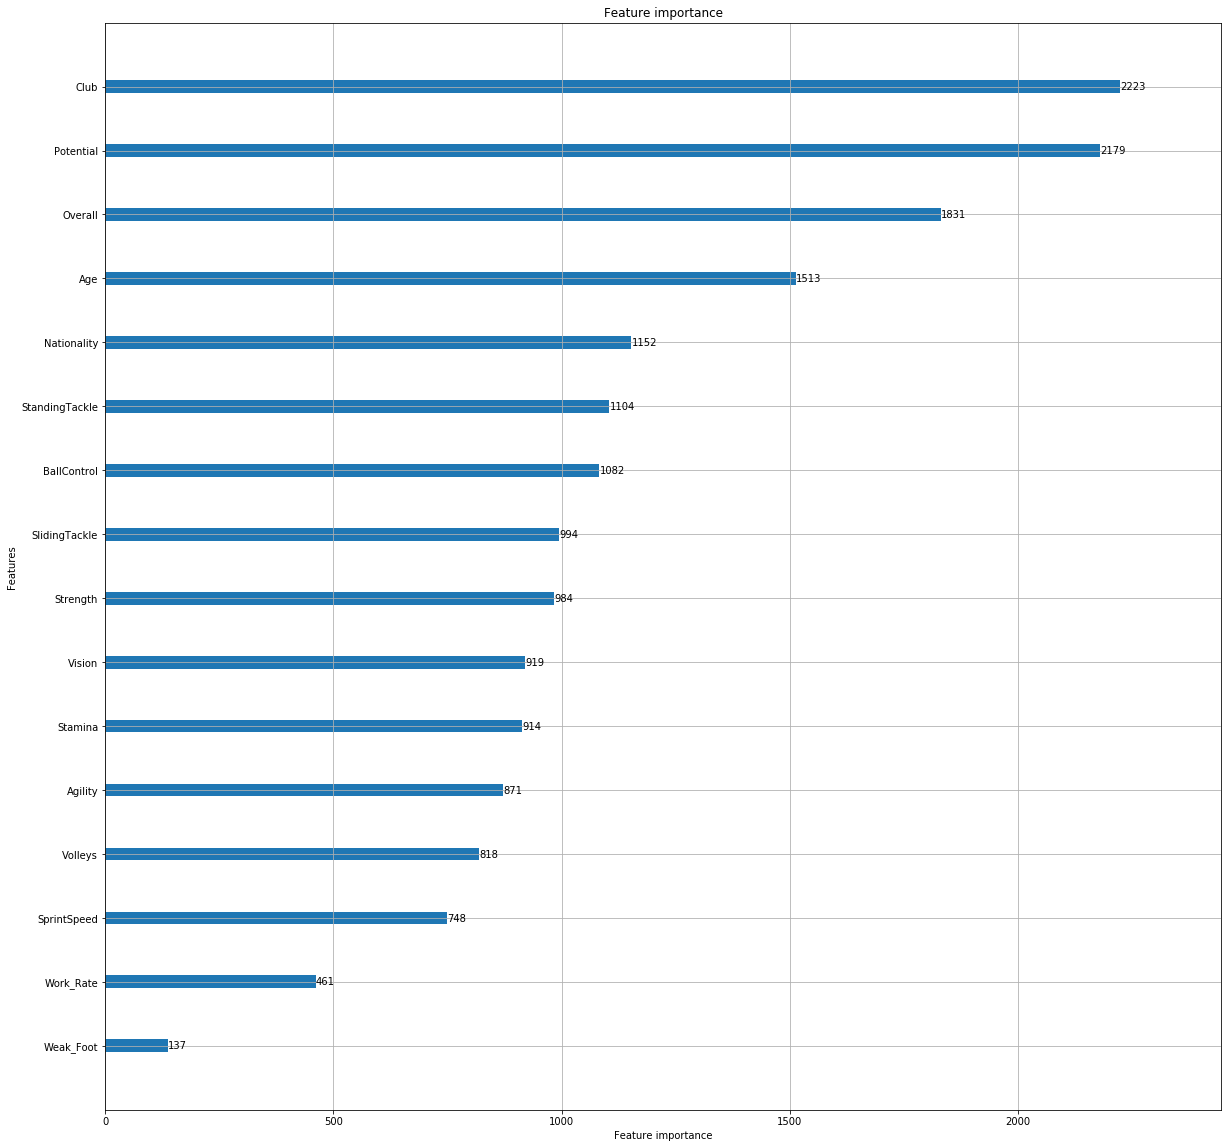

In [124]:
figure(num=None, figsize = (20,20))
gbm_split_imp_plot = gbm.plot_importance(gbm_clf)
fig = gbm_split_imp_plot.figure
fig.set_size_inches(20,20)

In [125]:
gbm_shap_explainer = shap.TreeExplainer(bst)

In [126]:
gbm_shap_vals_train = gbm_shap_explainer.shap_values(x_train)

In [127]:
gbm_shap_vals_train.dtype

dtype('float32')

In [128]:
gbm_shap_vals_test = gbm_shap_explainer.shap_values(x_test)

In [129]:
shap.initjs()
shap.force_plot(gbm_shap_explainer.expected_value, gbm_shap_vals_train[0,:], x_train.iloc[0,:])

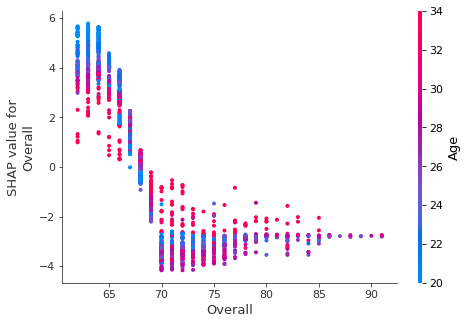

In [130]:
shap.initjs()
shap.dependence_plot("Overall", gbm_shap_vals_test, x_test)

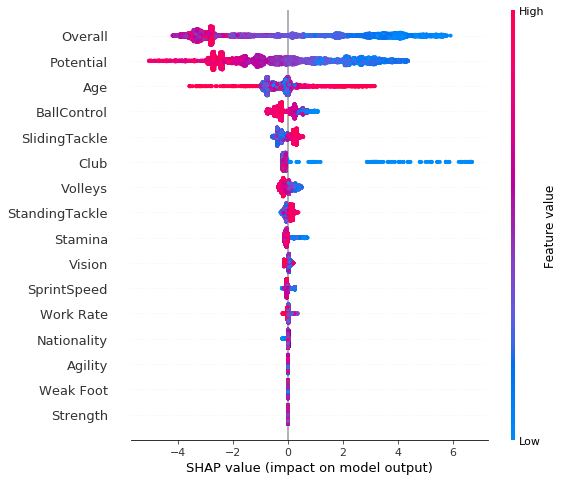

In [131]:
shap.summary_plot(gbm_shap_vals_train, x_train)

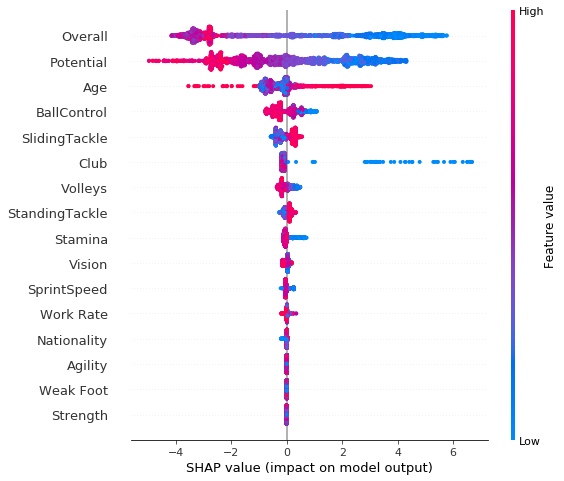

In [132]:
shap.summary_plot(gbm_shap_vals_test, x_test)

In [133]:
gbm_var_interactions = shap.TreeExplainer(bst).shap_interaction_values(x_test)

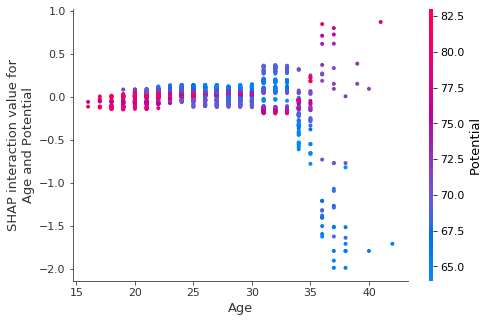

In [134]:
shap.dependence_plot(("Age","Potential"),
                     gbm_var_interactions, x_test,
                     display_features = x_test)